# Plotting the Logistic Regression 

Imports:

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', rc={'axes.linewidth':1, 'axes.edgecolor':'black'})
%matplotlib inline

Creating the data:

In [61]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=50)

Plotting the data:

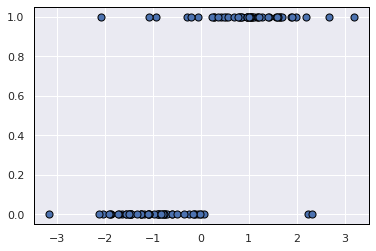

In [62]:
sns.scatterplot(x=X[:,0], y=y, cmap='Blues', edgecolor='black', linewidth=1, s=50)
plt.show()

## Scikit-learn

In [63]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Get the probabilities:

In [64]:
regressor.predict_proba(X)[:,1]

array([0.46855437, 0.06718436, 0.0718247 , 0.79826129, 0.86518943,
       0.9019563 , 0.96967769, 0.0357482 , 0.61360102, 0.93848828,
       0.25611806, 0.06795237, 0.02684076, 0.61399896, 0.03440817,
       0.1754248 , 0.85767909, 0.17849701, 0.07133949, 0.66938115,
       0.99049692, 0.86371982, 0.59578261, 0.05985247, 0.20950503,
       0.38954652, 0.19499299, 0.21296283, 0.0523152 , 0.8718992 ,
       0.80556834, 0.94597039, 0.04786132, 0.94672312, 0.0995848 ,
       0.16309164, 0.22549491, 0.16899944, 0.06016191, 0.2553641 ,
       0.96312496, 0.95023198, 0.71070243, 0.02488968, 0.69544323,
       0.07228714, 0.49910612, 0.9961332 , 0.10916132, 0.0465872 ,
       0.94157037, 0.81613807, 0.16726084, 0.14930785, 0.8428032 ,
       0.12527654, 0.80870009, 0.20298176, 0.29130363, 0.7242069 ,
       0.85550658, 0.88470457, 0.09930277, 0.43340265, 0.12832494,
       0.44500857, 0.1280114 , 0.47195062, 0.84134959, 0.10084298,
       0.92170501, 0.9641311 , 0.00391881, 0.9401495 , 0.83874

Plot the probabilities:

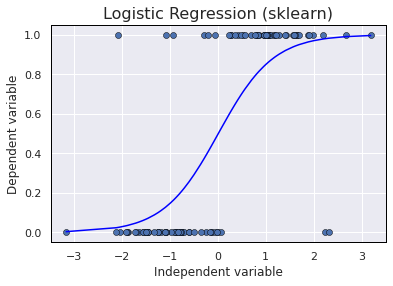

In [65]:
sns.scatterplot(x=X[:,0], y=y, edgecolor='black')
sns.lineplot(x=X[:,0], y=regressor.predict_proba(X)[:,1], color='blue')

plt.title('Logistic Regression (sklearn)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.show()

Get the classification (above and below 0.5):

In [66]:
regressor.predict(X)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

## Logistic Regression with Statsmodels

In [67]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y,X_with_const)
logit_model = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.361364
         Iterations 7


Get the probabilities:

In [68]:
logit_model.predict(X_with_const)

array([0.46785179, 0.05142155, 0.05545815, 0.82364865, 0.88886466,
       0.92270723, 0.97947896, 0.02524454, 0.62848876, 0.95445408,
       0.23601172, 0.05208697, 0.01829669, 0.62892465, 0.02418317,
       0.15314386, 0.88175922, 0.15621166, 0.05503429, 0.68910401,
       0.99440225, 0.88747903, 0.6089295 , 0.04512466, 0.18759299,
       0.38028298, 0.17281483, 0.19113652, 0.03876332, 0.89516086,
       0.83095873, 0.96066506, 0.03506239, 0.96128348, 0.08033426,
       0.14091001, 0.20404756, 0.14675366, 0.04538832, 0.2352182 ,
       0.97442926, 0.96414987, 0.73322881, 0.01681145, 0.71702451,
       0.05586251, 0.50183663, 0.99794673, 0.08917166, 0.03401213,
       0.95702632, 0.84145714, 0.14503072, 0.12740041, 0.86751404,
       0.10430098, 0.83407884, 0.18093105, 0.27337052, 0.74747257,
       0.87969276, 0.90703364, 0.08007584, 0.42879841, 0.10719694,
       0.44168155, 0.10689859, 0.471629  , 0.86611037, 0.08148843,
       0.94013857, 0.97521297, 0.0021317 , 0.95584283, 0.86358

Plot the probabilities:

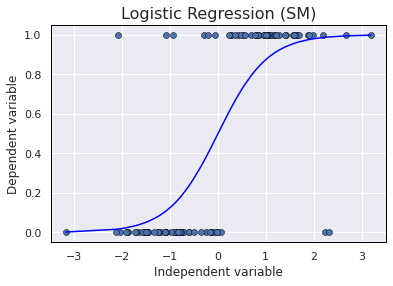

In [69]:
sns.scatterplot(x=X[:,0], y=y, edgecolor='black')
sns.lineplot(x=X[:,0], y=logit_model.predict(sm.add_constant(X[:,0])), color='blue')

plt.title('Logistic Regression (SM)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.show()

Get the classification (above and below 0.5):

In [70]:
logit_model.predict(X_with_const).round()

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

## Model evaluation (ROC Curve):

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [72]:
accuracy_score(y, regressor.predict(X))

0.91

#### Creating the ROC Curve and finding the best threshold point

In [73]:
predicted_proba = regressor.predict_proba(X)[:,1]

In [74]:
FPR, TPR, thresholds = roc_curve(y, predicted_proba)

In [75]:
threshold = thresholds[np.argmax(TPR - FPR)]

In [76]:
threshold

0.5957826074548105

In [77]:
y_pred = np.array(list(map(lambda prob: 0 if prob < threshold else 1, predicted_proba)))

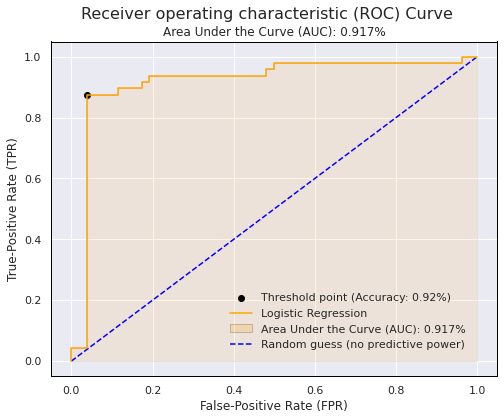

In [78]:
from matplotlib.patches import Polygon, Patch

fig, ax = plt.subplots(figsize=(8,6))
plt.subplots_adjust(top=0.9)
plt.suptitle('Receiver operating characteristic (ROC) Curve', fontsize=16)
plt.title(f'Area Under the Curve (AUC): {round(roc_auc_score(y, predicted_proba),3)}%')
plt.xlabel('False-Positive Rate (FPR)'), plt.ylabel('True-Positive Rate (TPR)')

ax.plot([0,1],[0,1], color='blue', linestyle='--' ,label='Random guess (no predictive power)')
ax.plot(FPR, TPR, color='orange', label ='Logistic Regression')
ax.add_patch(Polygon(list(zip(np.append(FPR,1),np.append(TPR,0))), facecolor='orange', edgecolor='black', alpha=0.1))
ax.scatter(FPR[np.argmax(TPR - FPR)], TPR[np.argmax(TPR - FPR)], color='black', label=f'Threshold point (Accuracy: {accuracy_score(y, y_pred)}%)')

handles,labels = ax.get_legend_handles_labels()

ax.legend(handles=[handles[2],handles[1],Patch(facecolor='orange', edgecolor='black', alpha=0.2),handles[0]],
          labels=[labels[2],labels[1],f'Area Under the Curve (AUC): {round(roc_auc_score(y, predicted_proba),3)}%',labels[0]], frameon=False,
          bbox_to_anchor=(-0.05,0.05,1,1))
plt.show()